In [1]:
!pip install pelote
!pip install ipysigma

In [2]:
import networkx as nx
from ipysigma import Sigma, SigmaGrid
from pelote import remove_leaves, graph_to_edges_dataframe, remove_nodes
from random import random
import csv

In [3]:
### read csv line by line
with open('edgelist_v5.csv') as f:
    g = nx.DiGraph()
    #cut off before 2020
    for row in csv.DictReader(f):
        if row ['datetime'][:4] < '2020':
            continue
        if row['source'] == row['target']:
            continue
        g.add_node(row['source'], channel_category='basis' in row['source'])
        g.add_node(row['target'], channel_category='basis' in row['target'])
        if g.has_edge(row['source'], row['target']):
            g[row['source']][row['target']]['weight'] += 1
        else:
            g.add_edge(row['source'], row['target'], weight=1)
remove_leaves(g) # function that searches node degree = 1 and drops it 
#remove_nodes(g, lambda n, a: ('channel_category' in a)) # this to drop node if not in a; but it made graph unreadable
g.order(), g.size()

(4886, 38498)

<Axes: ylabel='Frequency'>

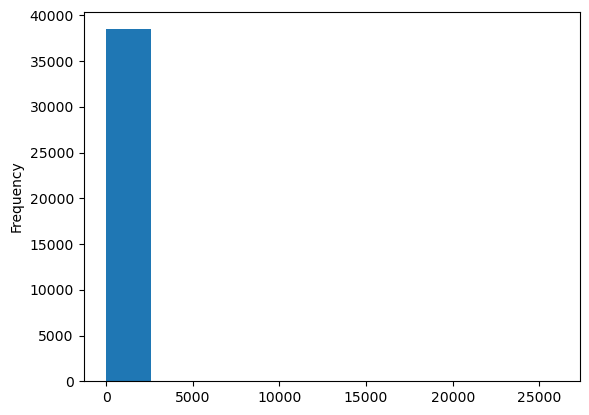

In [4]:
graph_to_edges_dataframe(g).weight.plot.hist()

In [5]:
max(g.edges.data(), key=lambda t: t[2]['weight'])

('unzensiertv2', 'unzensiert_infoseite', {'weight': 26021})

In [6]:
from collections import Counter
weights = Counter()
for source, target, weight in g.edges.data('weight'):
    weights[(source, target)] += weight

weights.most_common(10)

[(('unzensiertv2', 'unzensiert_infoseite'), 26021),
 (('druschbafm_en', 'druschbafm'), 23677),
 (('bundeswehr_de', 'bundeswehrinfo'), 18214),
 (('corona_reset', 'medienzensur'), 15221),
 (('druschbafm', 'druschbafm_bulgaria'), 15204),
 (('kurze_vids', 'kurze_vids_kalender'), 7262),
 (('junges_blut', 'conspiracyfactsdeutsch'), 5060),
 (('druschbafm', 'druschbafm_en'), 3696),
 (('stinksack', 'surensohn'), 3161),
 (('freienordrheinwestfalenoffiziell', 'freienordrheinwestfalen'), 2781)]

perhaps merge nodes based on string, but not "basis"?

In [7]:
#for single graph
#Sigma(g, node_size=g.degree, node_color=lambda n: random() > 0.5)

In [8]:
SigmaGrid(g, node_size=g.in_degree, node_zindex='channel_category', views=[
 {"node_metrics": ['louvain'], 'node_color': 'louvain'}, 
 {  'node_color': 'channel_category', 
      'node_color_palette': {True: "red", False: "lightblue"}
    }
])

check out ipysigma on git medialab/ipysigma

**METRICS**
use in-degree (n edges)
weighted (sum of all weights edges)
degree centrality (normalised version of degree) -> relative importance of node for network
page rank (better than betweenness), recursive importance -> node important if important nodes sent links to it

In [9]:
import pandas as pd
degree_dict = dict(g.degree())
in_degree_dict = dict(g.in_degree())
page_rank_dict = nx.pagerank(g)
degree_centrality_dict = nx.degree_centrality(g)
betweenness_centrality_dict = nx.betweenness_centrality(g)
degree_df = pd.DataFrame(degree_dict.items(), columns=['Node', 'Degree']).sort_values(by='Degree', ascending=False)
in_degree_df = pd.DataFrame(in_degree_dict.items(), columns=['Node', 'In-Degree']).sort_values(by='In-Degree', ascending=False)
page_rank_df = pd.DataFrame(page_rank_dict.items(), columns=['Node', 'PageRank']).sort_values(by='PageRank', ascending=False)
degree_centrality_df = pd.DataFrame(degree_centrality_dict.items(), columns=['Node', 'Degree Centrality']).sort_values(by='Degree Centrality', ascending=False)
betweenness_centrality_df = pd.DataFrame(betweenness_centrality_dict.items(), columns=['Node', 'Betweenness Centrality']).sort_values(by='Betweenness Centrality', ascending=False)
top_20_degree = degree_df.head(20)
top_20_in_degree = in_degree_df.head(20)
top_20_page_rank = page_rank_df.head(20)
top_20_degree_centrality = degree_centrality_df.head(20)
top_20_betweenness_centrality = betweenness_centrality_df.head(20)

In [10]:
print("Top 20 Nodes by Degree:\n", top_20_degree, "\n")
print("Top 20 Nodes by In-Degree:\n", top_20_in_degree, "\n")
print("Top 20 Nodes by PageRank:\n", top_20_page_rank, "\n")
print("Top 20 Nodes by Degree Centrality:\n", top_20_degree_centrality, "\n")
print("Top 20 Nodes by Betweenness Centrality:\n", top_20_betweenness_centrality, "\n")

Top 20 Nodes by Degree:
                          Node  Degree
921              corona_reset    1535
50          prozessbeobachter     796
947                 aufdecker     791
315                 ra_ludwig     577
259         brandenburgtvinfo     529
260                freielinke     527
1230         efauf_newsletter     476
162         davidclaudiosiber     473
170      weiterdenken_marburg     472
127                    haintz     457
151            infodefgermany     453
105            apoduesseldorf     452
2000        sabrinakollmorgen     450
915              medienzensur     448
408         freepeoplegermany     427
924          geradeaus_denken     424
110   ubersicht_ukraine_kanal     415
1444                 freiesth     414
331            coronasolution     412
989               junges_blut     409 

Top 20 Nodes by In-Degree:
                       Node  In-Degree
127                 haintz        156
113              kenjebsen        149
13                joinchat       

In [11]:
# Convert to LaTeX
print(top_20_degree.to_latex(index=False))
print(top_20_in_degree.to_latex(index=False))
print(top_20_page_rank.to_latex(index=False))
print(top_20_degree_centrality.to_latex(index=False))
print(top_20_betweenness_centrality.to_latex(index=False))

\begin{tabular}{lr}
\toprule
Node & Degree \\
\midrule
corona_reset & 1535 \\
prozessbeobachter & 796 \\
aufdecker & 791 \\
ra_ludwig & 577 \\
brandenburgtvinfo & 529 \\
freielinke & 527 \\
efauf_newsletter & 476 \\
davidclaudiosiber & 473 \\
weiterdenken_marburg & 472 \\
haintz & 457 \\
infodefgermany & 453 \\
apoduesseldorf & 452 \\
sabrinakollmorgen & 450 \\
medienzensur & 448 \\
freepeoplegermany & 427 \\
geradeaus_denken & 424 \\
ubersicht_ukraine_kanal & 415 \\
freiesth & 414 \\
coronasolution & 412 \\
junges_blut & 409 \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
Node & In-Degree \\
\midrule
haintz & 156 \\
kenjebsen & 149 \\
joinchat & 148 \\
ra_ludwig & 140 \\
faktenfriedenfreiheit & 138 \\
bitteltv & 136 \\
rabbitresearch & 135 \\
freiemedientv & 132 \\
rosenbusch & 129 \\
demotermine & 128 \\
rasattelmaier & 125 \\
s & 124 \\
wirsindvielmehr & 124 \\
querdenken_711 & 120 \\
auf1tv & 118 \\
freiesachsen & 117 \\
c & 116 \\
allesaussermainstream & 111 \\
expressz

In [13]:
import networkx as nx

# Assuming 'g' is your directed graph and communities are stored in node attribute 'louvain'
def count_community_sizes(graph):
    # Initialize a dictionary to count the nodes in each community
    community_sizes = {}
    
    # Iterate over all nodes and their attributes
    for node, data in graph.nodes(data=True):
        # Get the community id from the node attributes
        community_id = data.get('louvain')
        if community_id in community_sizes:
            community_sizes[community_id] += 1
        else:
            community_sizes[community_id] = 1

    return community_sizes


In [14]:
# Call the function and print the community sizes
community_sizes = count_community_sizes(g)
for community, size in community_sizes.items():
    print(f"Community {community}: {size} nodes")

Community None: 4886 nodes
